In [593]:
import pandas as pd
import seaborn as sns
#read csv
df =pd.read_csv('data/adult.csv')
#head - 1st 5 rows
df.sample(6)



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
23848,43,Private,241928,HS-grad,9,Separated,Adm-clerical,Not-in-family,Black,Female,0,0,32,United-States,<=50K
13161,65,?,137354,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,20,United-States,<=50K
2143,52,Private,54933,Masters,14,Divorced,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K
22991,36,Private,198841,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
999,39,Self-emp-inc,329980,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,50,United-States,>50K
25461,38,Private,338320,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,Canada,<=50K


In [594]:

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [595]:
#Class uniq
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [596]:
#Missing value check
df.isnull().sum()
#No null values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [597]:
#No mising values values 

In [598]:
#Duplicate check ,
df.duplicated().sum()

24

In [599]:
#24 duplicates so remove it
df = df.drop_duplicates()
#Duplicate again check and ensure those removed
df.duplicated().sum()

0

In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  class           32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [601]:
#Drop Id column since it has no influence in results

In [602]:
df_back=df.copy()
#df=df.drop(labels=["",  "ID"],axis=1)


In [603]:
#segregate numerical & categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print(categorical_columns)
print(numerical_columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class'],
      dtype='object')
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [604]:
df[categorical_columns].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [605]:
#Remove white space from categorical values
#df2['employee_id'].str.strip()
for i in categorical_columns:
    df[i]=df[i].str.strip()
#for i in categorical_columns:
    #print(i,'#'*15) 
    #print(df[i].unique())   



In [606]:
df[numerical_columns].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [607]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32537 non-null  object
 1   education       32537 non-null  object
 2   marital-status  32537 non-null  object
 3   occupation      32537 non-null  object
 4   relationship    32537 non-null  object
 5   race            32537 non-null  object
 6   sex             32537 non-null  object
 7   native-country  32537 non-null  object
 8   class           32537 non-null  object
dtypes: object(9)
memory usage: 2.5+ MB


In [608]:
df[numerical_columns].info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   fnlwgt          32537 non-null  int64
 2   education-num   32537 non-null  int64
 3   capital-gain    32537 non-null  int64
 4   capital-loss    32537 non-null  int64
 5   hours-per-week  32537 non-null  int64
dtypes: int64(6)
memory usage: 1.7 MB


In [609]:
df[categorical_columns].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,32537,32537,32537,32537,32537,32537,32537,32537,32537
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22673,10494,14970,4136,13187,27795,21775,29153,24698


In [610]:
#Unique values of categorical columns 
#for i in categorical_columns:
    #print(i,':',df[i].unique())



In [611]:
#Replace ? with most occuring item

print('Bef replace ? workclass',df['workclass'].unique())
print('Bef replace ?  occupation',df['occupation'].unique())
print('Bef replace ?  native_country',df['native-country'].unique())

df['workclass']  = df['workclass'].str.replace("?","Private",regex=True)
df['occupation']  = df['occupation'].str.replace("?","Prof-specialty",regex=True)
df['native-country']  = df['native-country'].str.replace("?","United-States",regex=True)

print('############### after replace ? to most frequest value\n workclass',df['workclass'].unique())
print('occupation',df['occupation'].unique())
print('native-country',df['native-country'].unique())


Bef replace ? workclass ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Bef replace ?  occupation ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Bef replace ?  native_country ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
############### after replace ? to most frequest value
 workclass ['State-gov' 'Self-emp-not

In [612]:
#Confirm the '? ' replaces with most occuring 
for i in categorical_columns:
    print(i,':',df[i].unique())

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race : ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex : ['Male' 'Female']
native-country : ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'South' 'Puerto-Rico'
 'Honduras' 'England' 'Cana

In [613]:
#confirmed all ? replaced with mostly occuring char

In [614]:
#'NAN' is coming a value in many categories,so we will replace this with most occuering value
#df[categorical_columns]  = df[categorical_columns].replace("?","<br>")
#df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0]) 

In [615]:
#Store clean data 

import os
clean_csv=os.path.join('data','adult_clean.csv')
#column name correcting 
dict = {'education-num': 'education_num',
        'marital-status': 'marital_status',
        'capital-gain': 'capital_gain',
		'capital-loss': 'capital_loss',
		'hours-per-week': 'hours_per_week',
		'native-country': 'native_country',
		'class': 'Class',
		}
 
# call rename () method
df.rename(columns=dict,         inplace=True)
#segregate numerical & categorical columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print('Cat colums - renamed to _',categorical_columns)
print('Num colums - renamed to _',numerical_columns)
     








Cat colums - renamed to _ Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'Class'],
      dtype='object')
Num colums - renamed to _ Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [616]:
#convert to numeiric for  'class'
#df['Class']=df['Class'].astype(int)
#print('cat column ',categorical_columns)
list=[]
for i in df['Class']:
    if " <=50K" in i:
        list.append(40000)
    elif " >50K" in df['Class']:
        list.append(60000)
    else:
       list.append(60000) 
df['Class']=list
#[' <=50K' ' >50K']

In [617]:
#Store cleaned csv 
df.to_csv(clean_csv,index=False)

In [642]:
#Testing the stored csv
df1=pd.read_csv(clean_csv)
#df1.describe()
#print('Info of stored Data to doubel check ',df1.info())
print('Just double check the stored dataframe by reading it  #######\n',df1.sample(5))



Just double check the stored dataframe by reading it  #######
        age    workclass  fnlwgt     education  education_num  \
6639    19      Private  131615       HS-grad              9   
31276   29  Federal-gov  242147       HS-grad              9   
29996   46      Private  200734  Some-college             10   
6641    43      Private  178417     Bachelors             13   
13709   37      Private  190987  Some-college             10   

           marital_status         occupation   relationship   race     sex  \
6639        Never-married  Machine-op-inspct      Own-child  White    Male   
31276            Divorced       Adm-clerical  Not-in-family  Other    Male   
29996            Divorced       Adm-clerical      Unmarried  Black  Female   
6641             Divorced     Prof-specialty  Not-in-family  White    Male   
13709  Married-civ-spouse              Sales           Wife  White  Female   

       capital_gain  capital_loss  hours_per_week   native_country  Class  
6639   

In [643]:
#Stored csv check - Unique values of categorical columns 
for i in categorical_columns:
    print(i,':',df1[i].unique())
    print('#'*50)

workclass : ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
##################################################
education : ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
##################################################
marital_status : ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
##################################################
occupation : ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
##################################################
relationship : ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
############

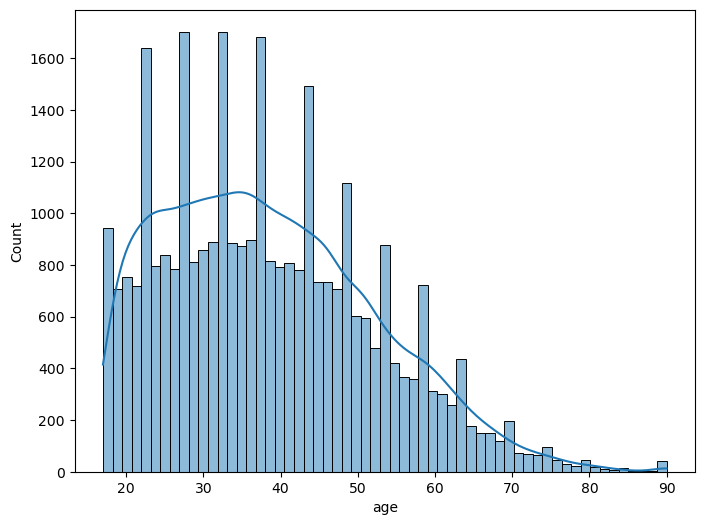

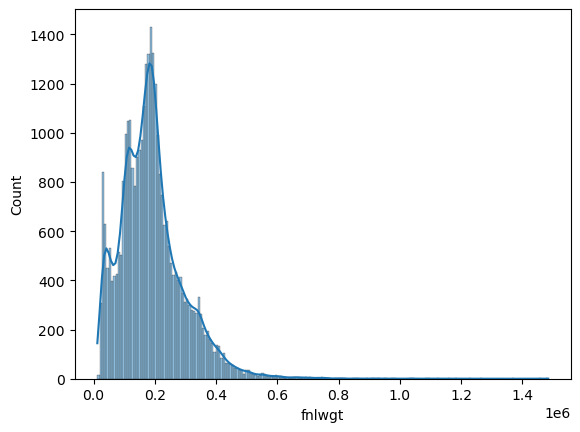

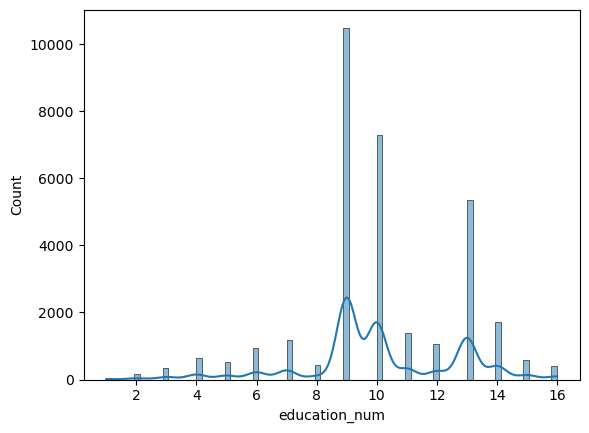

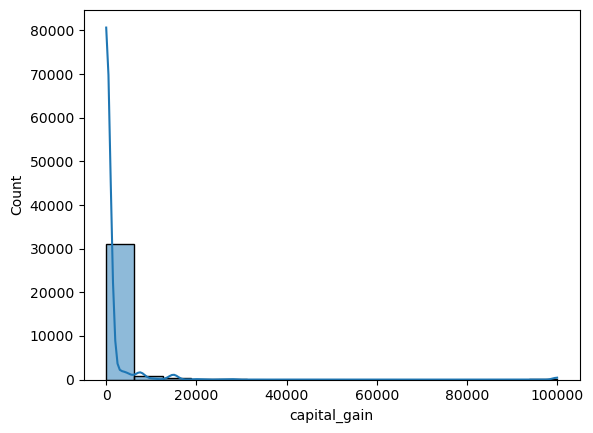

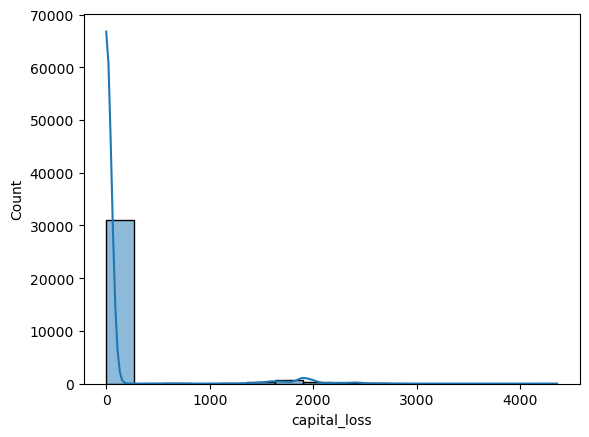

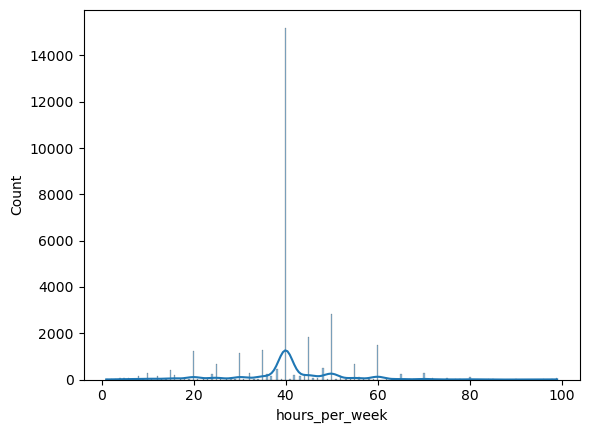

In [619]:
#Histogram for numerical  columns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

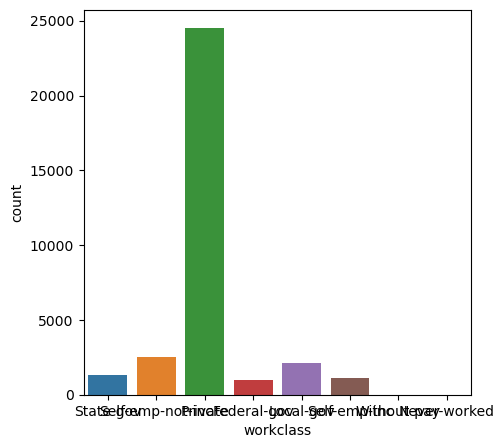

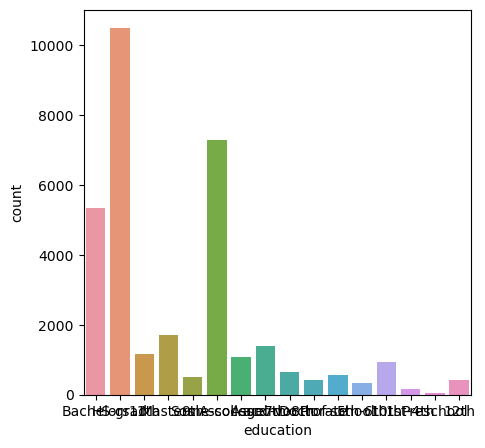

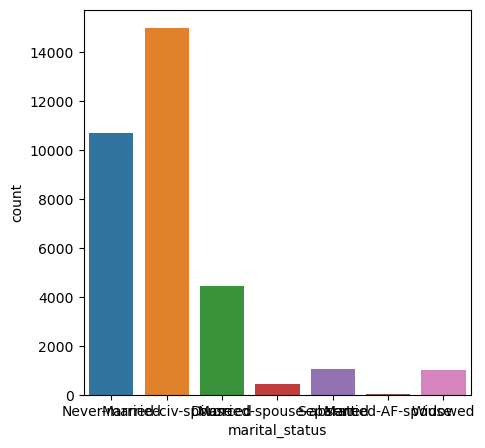

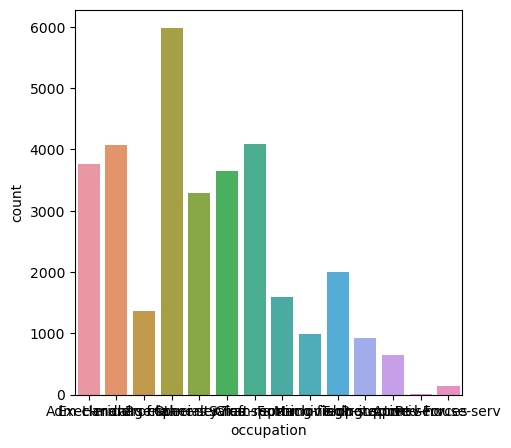

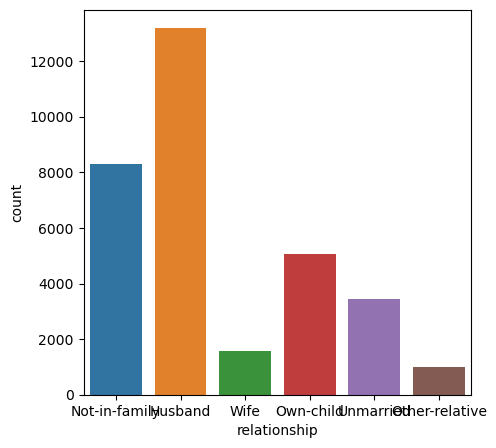

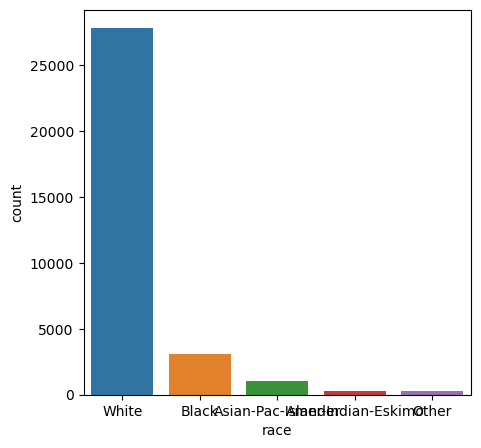

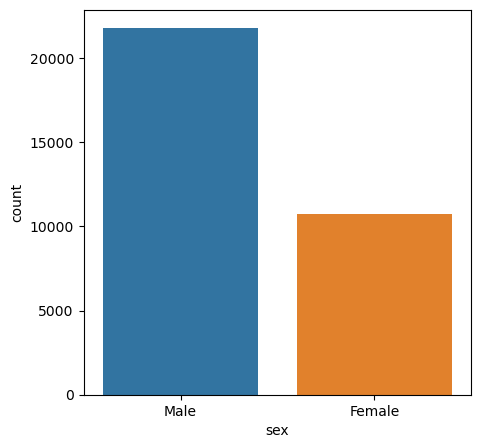

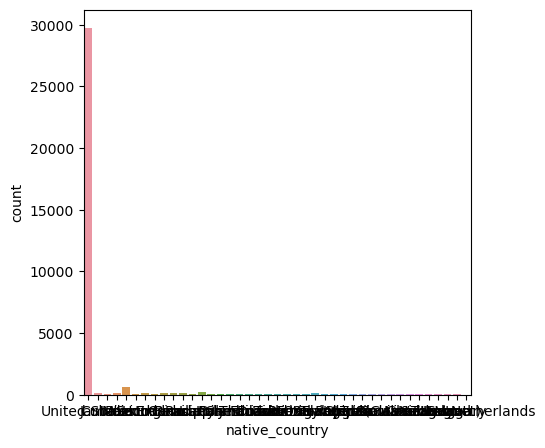

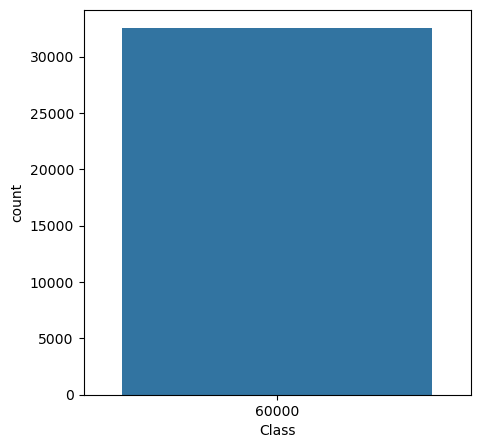

In [620]:
#Categorical Plots
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.countplot(x =i, data = df)
    print('\n')
    plt.show()

In [621]:
#Strip plot - categorical columns
for i in categorical_columns:
    plt.figure(figsize=(5,5))
    sns.stripplot(x =i, y ='class', data = df, jitter = True, dodge = True)
    print('\n')
    plt.show()

ValueError: Could not interpret value `class` for parameter `y`

<Figure size 500x500 with 0 Axes>

In [ ]:
#correlation

categorical_columns


In [ ]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,40000
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,40000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,40000
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,40000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,40000


In [ ]:
#correlation
df.corr()

C:\Users\sujith.ks\AppData\Local\Temp\ipykernel_14700\3302858938.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,Class
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education_num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
Class,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


C:\Users\sujith.ks\AppData\Local\Temp\ipykernel_14700\3119047.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidths=.5)


<Axes: >

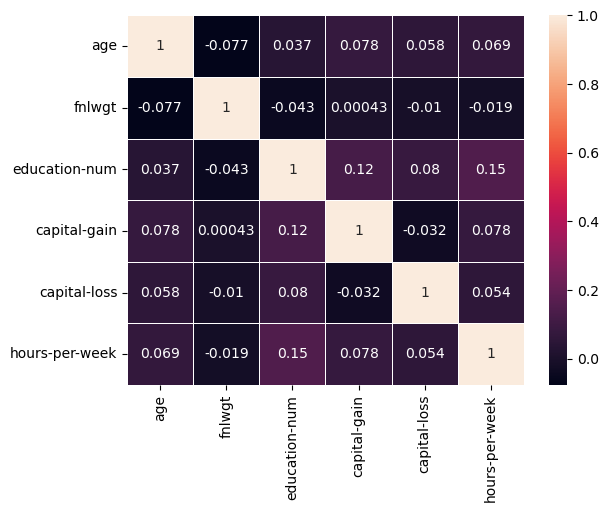

In [ ]:
#Heatmap
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [ ]:
#Class uniq
#Unique values of categorical columns 
for i in categorical_columns:
    print(i,':',df[i].unique())
    print('#'*50)

workclass : [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
##################################################
education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
##################################################
marital_status : [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
##################################################
occupation : [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
##################################################
relationship : [' Not-in-family' ' Husband' ' Wife' ' Own-